In [1]:
import os
os.environ['TZ'] = 'America/New_York'

In [2]:
import pandas
import seaborn as sns
reviews = pandas.read_csv("reviews_bootcamp.csv")

In [3]:
reviews.sample(5)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_unhelp,helpful_frac
43530,B0000C0FBM,"[7, 10]",5,I am sorry but I am sick of people saying that...,"03 11, 2005",A2GPUFRP0HV6XW,"J. Sutherland ""zeppfan""",Derivative?,1110499200,3,0.700000
46155,B0002A2WAO,"[1, 1]",5,Lloyd Banks Hunger For More is in tha top five...,"07 10, 2004",A61V9CDWK2RQN,"Dee Talley ""lilthug82001""",hunger for more/ do u get tha message 50,1089417600,0,1.000000
53505,B000J103X4,"[3, 3]",4,PROS.THE GAME IS A GREAT MC WHO HAS A GOOD FUT...,"01 16, 2007",A2XQ48481DIO80,"streets is watching ""critic in the making""",can the game make up his mind!,1168905600,0,1.000000
3968,B000001E46,"[1, 1]",4,"One may question whether Martin Page was a ""on...","08 24, 2006",A2NQUGGYM0DBM1,L.A. Scene,Solid Album - It's Too Bad Martin Page Didn't ...,1156377600,0,1.000000
56619,B001BNK58W,"[1, 9]",2,"""Don't Trust Me"" by 3OH!3 is an odd techno/rap...","07 20, 2009",A3EBHHCZO6V2A4,"Amaranth ""music fan""","""Do the Helen Keller and talk with your hips""",1248048000,8,0.111111


In [4]:

# average_reviews_by_product = reviews.groupby("asin").helpful_frac.mean()
# average_reviews_by_product.sample(5)

# #.groupby("asin").count()
# # average_reviews_by_product.head()
# # average_reviews_by_product.sample(5)

# df = pd.DataFrame(data=average_reviews_by_product)
# average_reviews_by_product.head(5)
# df["frequency"] = reviews.groupby("asin").count()["helpful"]
# # asin, frac, quanti

# frequency_average_frac = df.groupby("frequency").helpful_frac.mean()
# df2 = pd.DataFrame(data=frequency_average_frac)
# df2["frequency2"] 
# # df["frequency"] 
# df2.sample(10)

# import seaborn as sns

# sns.boxplot("helpful_frac", "frequency", data = df2)
# # df.frequency.hist()



In [5]:
reviews_produto_frequente = reviews[
    reviews["asin"] == reviews["asin"].describe().top
]

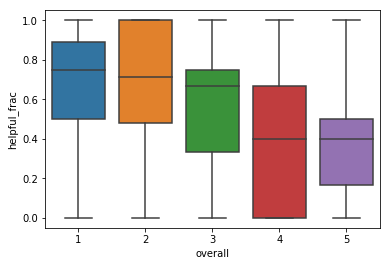

In [6]:
%matplotlib inline
sns.boxplot("overall", "helpful_frac", data=reviews_produto_frequente)

In [7]:
reviews.helpful = reviews.helpful.apply(eval)
helpful_separado = reviews.helpful.apply(pandas.Series)
helpful_separado.head()

,0,1
0,3,3
1,0,0
2,2,2
3,1,1
4,1,1


In [8]:
helpful_rename = helpful_separado.rename(
    columns={0:"is_helpful", 1: "total_helpful"}
)
helpful_rename.head()

,is_helpful,total_helpful
0,3,3
1,0,0
2,2,2
3,1,1
4,1,1


In [9]:
novas_datas = reviews.reviewTime.apply(pandas.to_datetime)
# ou pandas.to_datetime(reviews.reviewTime)

In [10]:
reviews["time"] = novas_datas
reviews.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_unhelp,helpful_frac,time
0,5555991584,"[3, 3]",5,"It's hard to believe ""Memory of Trees"" came ou...","09 12, 2006",A3EBHHCZO6V2A4,"Amaranth ""music fan""",Enya's last great album,1158019200,0,1.0,2006-09-12
1,5555991584,"[0, 0]",5,"A clasically-styled and introverted album, Mem...","06 3, 2001",AZPWAXJG9OJXV,bethtexas,Enya at her most elegant,991526400,0,0.0,2001-06-03
2,5555991584,"[2, 2]",5,I never thought Enya would reach the sublime h...,"07 14, 2003",A38IRL0X2T4DPF,bob turnley,The best so far,1058140800,0,1.0,2003-07-14
3,5555991584,"[1, 1]",5,This is the third review of an irish album I w...,"05 3, 2000",A22IK3I6U76GX0,Calle,Ireland produces good music.,957312000,0,1.0,2000-05-03
4,5555991584,"[1, 1]",4,"Enya, despite being a successful recording art...","01 17, 2008",A1AISPOIIHTHXX,"Cloud ""...""",4.5; music to dream to,1200528000,0,1.0,2008-01-17


In [11]:
reviews["year"] = reviews.time.dt.year
reviews.sample(5)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_unhelp,helpful_frac,time,year
55041,B000UMQDHC,"[0, 1]",4,Raising Sand is a great collaboration album b...,"05 19, 2009",A2TAPL67U2A5HM,Bjorn Viberg,Raising Sand,1242691200,1,0.0,2009-05-19,2009
39880,B00006LV77,"[0, 0]",5,I love this CD. It's Deborah's best CD of all...,"03 24, 2004",A1143SNKOV0ZIT,Eyebrows,Deborah's best!!!,1080086400,0,0.0,2004-03-24,2004
51056,B000BKSISA,"[0, 0]",4,From Smother Magazine - [...]Linkin Park's Mik...,"11 27, 2005",A1B06TR6SQRFB6,"Jason Shawn ""fistagon7""",Hip-hop's new fortress,1133049600,0,0.0,2005-11-27,2005
58472,B002HVLAG8,"[1, 1]",4,I am so happy to have this album because I adm...,"01 27, 2010",A1RT55WQFWRD6H,"Hillary ""avoiding road rage one book at a tim...",Indie Darlings Do GOOD,1264550400,0,1.0,2010-01-27,2010
42235,B00009LI14,"[1, 1]",5,"Michelle Branch discovers her new, harder edge...","12 26, 2003",A1YQ6QB2127AJ4,David Anderson,Her Newfound Edge Rocks,1072396800,0,1.0,2003-12-26,2003


In [12]:
reviews["reviewTextFilled"] = reviews.reviewText.fillna("")

In [13]:
def sum_helpful_frac(dataframe_group):
    serie_helpful = dataframe_group["helpful_frac"]
    return serie_helpful.sum()

In [14]:
result_groupby_apply = reviews.groupby("asin").apply(sum_helpful_frac)
result_groupby_apply.head()

asin
5555991584    17.599145
B0000000ZW    10.522222
B00000016T    35.813808
B00000016W    81.536503
B00000017R    16.510544
dtype: float64

In [15]:
type(result_groupby_apply)

pandas.core.series.Series

In [16]:
median = reviews.helpful_frac.median()
median

0.5714285714285714

In [17]:
def review_classifier(df_group):
    if(df_group.helpful_frac.median() > median):
        return "Good Reviews"
    else:
        return "Bad Reviews"

In [18]:
review_of_reviewer = reviews.groupby("reviewerID").apply(review_classifier)
review_of_reviewer.head()


reviewerID
A08161909WK3HU7UYTMW     Bad Reviews
A1020L7BWW9RAX           Bad Reviews
A10323WWTFPSGP           Bad Reviews
A103KNDW8GN92L          Good Reviews
A103W7ZPKGOCC9           Bad Reviews
dtype: object

In [19]:
review_of_reviewer["A1020L7BWW9RAX"]

'Bad Reviews'

In [20]:
# def reviewer_quality(row):
#     return review_of_reviewer[row["reviewerID"]]

# reviews["reviewer_quality"] = reviews.apply(reviewer_quality)
# reviews.head()

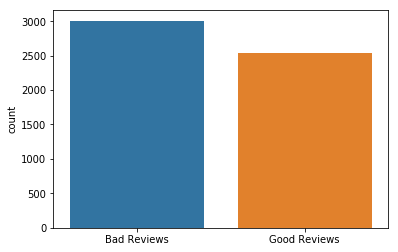

In [21]:
%matplotlib inline
sns.countplot(review_of_reviewer)

In [23]:
"a b c d".split()

['a', 'b', 'c', 'd']

In [29]:
reviews.sample(2)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful_unhelp,helpful_frac,time,year,reviewTextFilled
16030,B000002KZR,"[0, 0]",4,1984 would bring Van Halen to the mainstream. ...,"09 5, 2011",A3T9IX8EDFDX4G,John Alapick,A fine sendoff for Diamond Dave (4.5 stars),1315180800,0,0.0,2011-09-05,2011,1984 would bring Van Halen to the mainstream. ...
15292,B000002KHB,"[0, 0]",5,&quot;Machine head&quot; from 1972 shows Deep ...,"02 13, 2003",A1YQHOKBEFHFA5,L. B. Ivarsson,Deep Purple in their prime!,1045094400,0,0.0,2003-02-13,2003,&quot;Machine head&quot; from 1972 shows Deep ...


In [44]:
def concat_string(df_agrupado):
    return df_agrupado["reviewText"].str.split().sum()
# or
def concat_string(df_agrupado):
    return df_agrupado["reviewText"].str.cat(sep = " ").split()

In [45]:
agrupado_concatenado = reviews.groupby("asin").apply(concat_string)